# Outliner

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import os


In [2]:
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from outliener import Outlier

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option("expand_frame_repr", False)
pd.set_option('display.float_format', '{:.2f}'.format)

### Data reading

In [4]:
df= pd.read_csv("../data/preprocessed_data.csv")



In [5]:
df.head()

,Unnamed: 0,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,0,13114483460844900352.00,2019-04-04 12:01:00,770.00,2019-04-25 14:35:00,662.00,1823652.00,208201448079117.00,33664962239.00,35521209507511.00,9.16456699548519E+015,42.00,5.00,23.00,44.00,19520.00,7230.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,37624.00,38787.00,1823652892.00,Samsung,Samsung Galaxy A5 Sm-A520F,213.00,214.00,1545765.00,24420.00,1634479.00,1271433.00,3563542.00,137762.00,15854611.00,2501332.00,8198936.00,9656251.00,278082303.00,14344150.00,171744450.00,8814393.00,36749741.00,308879636.00
1,1,13114483482878900224.00,2019-04-09 13:04:00,235.00,2019-04-25 08:15:00,606.00,1365104.00,208201909211140.00,33681854413.00,35794009006359.00,L77566A,65.00,5.00,16.00,26.00,19520.00,7230.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,168.00,3560.00,1365104371.00,Samsung,Samsung Galaxy J5 (Sm-J530),971.00,1022.00,1926113.00,7165.00,3493924.00,920172.00,629046.00,308339.00,20247395.00,19111729.00,18338413.00,17227132.00,608750074.00,1170709.00,526904238.00,15055145.00,53800391.00,653384965.00
2,2,13114483484080500736.00,2019-04-09 17:42:00,1.00,2019-04-25 11:58:00,652.00,1361762.00,208200314458056.00,33760627129.00,35281510359387.00,D42335A,65.00,5.00,6.00,9.00,19520.00,7230.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,1361762651.00,Samsung,Samsung Galaxy A8 (2018),751.00,695.00,1684053.00,42224.00,8535055.00,1694064.00,2690151.00,672973.00,19725661.00,14699576.00,17587794.00,6163408.00,229584621.00,395630.00,410692588.00,4215763.00,27883638.00,279807335.00
3,3,13114483485442799616.00,2019-04-10 00:31:00,486.00,2019-04-25 07:36:00,171.00,1321509.00,208201402342131.00,33750343200.00,35356610164913.00,T21824A,65.00,5.00,44.00,44.00,19520.00,7230.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,3330.00,37882.00,1321509685.00,unknown,unknown,17.00,207.00,644121.00,13372.00,9023734.00,2788027.00,1439754.00,631229.00,21388122.00,15146643.00,13994646.00,1097942.00,799538153.00,10849722.00,749039933.00,12797283.00,43324218.00,846028530.00
4,4,13114483499480700928.00,2019-04-12 20:10:00,565.00,2019-04-25 10:40:00,954.00,1089009.00,208201401415120.00,33699795932.00,35407009745539.00,D88865A,65.00,5.00,6.00,9.00,19520.00,7230.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,1089009389.00,Samsung,Samsung Sm-G390F,607.00,604.00,862600.00,50188.00,6248284.00,1500559.00,1936496.00,173853.00,15259380.00,18962873.00,17124581.00,415218.00,527707248.00,3529801.00,550709500.00,13910322.00,38542814.00,569138589.00


In [6]:
df = df.drop("Unnamed: 0", axis=1)

In [7]:
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352.00,2019-04-04 12:01:00,770.00,2019-04-25 14:35:00,662.00,1823652.00,208201448079117.00,33664962239.00,35521209507511.00,9.16456699548519E+015,42.00,5.00,23.00,44.00,19520.00,7230.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,37624.00,38787.00,1823652892.00,Samsung,Samsung Galaxy A5 Sm-A520F,213.00,214.00,1545765.00,24420.00,1634479.00,1271433.00,3563542.00,137762.00,15854611.00,2501332.00,8198936.00,9656251.00,278082303.00,14344150.00,171744450.00,8814393.00,36749741.00,308879636.00
1,13114483482878900224.00,2019-04-09 13:04:00,235.00,2019-04-25 08:15:00,606.00,1365104.00,208201909211140.00,33681854413.00,35794009006359.00,L77566A,65.00,5.00,16.00,26.00,19520.00,7230.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,168.00,3560.00,1365104371.00,Samsung,Samsung Galaxy J5 (Sm-J530),971.00,1022.00,1926113.00,7165.00,3493924.00,920172.00,629046.00,308339.00,20247395.00,19111729.00,18338413.00,17227132.00,608750074.00,1170709.00,526904238.00,15055145.00,53800391.00,653384965.00
2,13114483484080500736.00,2019-04-09 17:42:00,1.00,2019-04-25 11:58:00,652.00,1361762.00,208200314458056.00,33760627129.00,35281510359387.00,D42335A,65.00,5.00,6.00,9.00,19520.00,7230.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,1361762651.00,Samsung,Samsung Galaxy A8 (2018),751.00,695.00,1684053.00,42224.00,8535055.00,1694064.00,2690151.00,672973.00,19725661.00,14699576.00,17587794.00,6163408.00,229584621.00,395630.00,410692588.00,4215763.00,27883638.00,279807335.00
3,13114483485442799616.00,2019-04-10 00:31:00,486.00,2019-04-25 07:36:00,171.00,1321509.00,208201402342131.00,33750343200.00,35356610164913.00,T21824A,65.00,5.00,44.00,44.00,19520.00,7230.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,3330.00,37882.00,1321509685.00,unknown,unknown,17.00,207.00,644121.00,13372.00,9023734.00,2788027.00,1439754.00,631229.00,21388122.00,15146643.00,13994646.00,1097942.00,799538153.00,10849722.00,749039933.00,12797283.00,43324218.00,846028530.00
4,13114483499480700928.00,2019-04-12 20:10:00,565.00,2019-04-25 10:40:00,954.00,1089009.00,208201401415120.00,33699795932.00,35407009745539.00,D88865A,65.00,5.00,6.00,9.00,19520.00,7230.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,1089009389.00,Samsung,Samsung Sm-G390F,607.00,604.00,862600.00,50188.00,6248284.00,1500559.00,1936496.00,173853.00,15259380.00,18962873.00,17124581.00,415218.00,527707248.00,3529801.00,550709500.00,13910322.00,38542814.00,569138589.00


In [8]:
df.shape

(146887, 47)

## Handiling Outlier

#### Here before getting to data exploration we are going to remove outliers

#### we need to select numeric colums first

In [9]:
Id = ["Bearer Id", 'IMSI', 'MSISDN/Number', 'IMEI']
categorical_columns = ["Last Location Name", "Handset Manufacturer", "Handset Type"]
columns_with_time = ['Start', 'End']


In [10]:
nun_numeric = Id
nun_numeric.extend(categorical_columns)
nun_numeric.extend(columns_with_time)
nun_numeric

['Bearer Id',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Handset Manufacturer',
 'Handset Type',
 'Start',
 'End']

In [11]:
numeric_columns = [col if col not in nun_numeric else ' ' for col in df]
numeric_columns = list(filter(lambda a: a != ' ', numeric_columns))
numeric_columns

['Start ms',
 'End ms',
 'Dur. (ms)',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Social Media DL (Bytes)',
 'Social Media UL (Bytes)',
 'Google DL (Bytes)',
 'Google UL (Bytes)',
 'Email DL (Bytes)',
 'Email UL (Bytes)',
 'Youtube DL (Bytes)',
 'Youtube UL (Bytes)',
 'Netflix DL (Bytes)',
 'Netflix UL (Bytes)',
 'Gaming DL (Bytes)',
 'Gaming UL (Bytes)',
 'Other DL (Bytes)',
 'Other UL (Bytes)',
 'Total UL (Bytes)',
 'Total DL (Bytes)']

In [12]:
numeric_df = df[numeric_columns].copy()

#### let's use the script we write in the Outlier class to overview the dataframe in terms of outliers 

In [13]:
df_outliers = Outlier(numeric_df)
overview = df_outliers.getOverview()
overview.sort_values(by=['number_of_outliers'], inplace=True)
overview

,Q1,median,Q3,IQR,skew,number_of_outliers,percentage_of_outliers,min_value,max_value,mean,lower,upper
label,,,,,,,,,,,,
Start ms,250.00,499.00,749.00,499.00,0.00,0,0.0%,0.00,999.00,499.12,-498.50,1497.50
Other UL (Bytes),4144551.00,8265817.00,12382039.50,8237488.50,0.00,0,0.0%,148.00,16558816.00,8262916.61,-8211681.75,24738272.25
Other DL (Bytes),210155459.00,421633232.00,631361047.50,421205588.50,0.00,0,0.0%,3290.00,843442489.00,421004008.43,-421652923.75,1263169430.25
Gaming UL (Bytes),4132622.00,8294516.00,12432390.50,8299768.50,-0.00,0,0.0%,59.00,16558794.00,8290279.88,-8317030.75,24882043.25
Gaming DL (Bytes),210381659.00,423492394.00,633333998.50,422952339.50,-0.00,0,0.0%,2516.00,843441889.00,422062341.16,-424046850.25,1267762507.75
Netflix UL (Bytes),5480202.00,10999348.00,16503222.50,11023020.50,-0.00,0,0.0%,35.00,22011955.00,11002760.66,-11054328.75,33037753.25
Netflix DL (Bytes),5776625.50,11642708.00,17469653.00,11693027.50,-0.00,0,0.0%,42.00,23259189.00,11626468.57,-11762915.75,35009194.25
Youtube UL (Bytes),5516549.00,11013447.00,16514278.00,10997729.00,-0.00,0,0.0%,105.00,22011962.00,11008675.87,-10980044.50,33010871.50
Youtube DL (Bytes),5833462.00,11616334.00,17440635.50,11607173.50,0.00,0,0.0%,53.00,23259098.00,11633306.01,-11577298.25,34851395.75


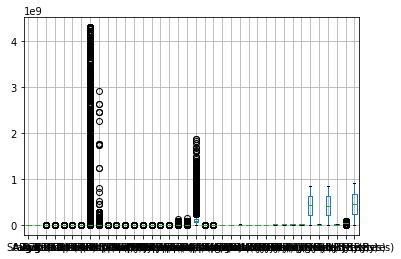

In [14]:
df[numeric_columns].boxplot()

#### from the boxplot above, the black circular points show the presence of lower  and upper inner fence value in the variable

##### so lets replace the columns with fences with IQR

In [15]:
df_outliers.replace_outliers_with_iqr(numeric_columns)

In [16]:
 df_outliers.getOverview()

,Q1,median,Q3,IQR,skew,number_of_outliers,percentage_of_outliers,min_value,max_value,mean,lower,upper
label,,,,,,,,,,,,
Start ms,250.00,499.00,749.00,499.00,0.00,0,0.0%,0.00,999.00,499.12,-498.50,1497.50
End ms,251.00,500.00,750.00,499.00,-0.00,0,0.0%,0.00,999.00,498.66,-497.50,1498.50
Dur. (ms),58526.50,86399.00,133159.00,74632.50,0.81,0,0.0%,7142.00,245107.75,100188.83,-53422.25,245107.75
Avg RTT DL (ms),31.00,44.00,67.00,36.00,1.07,0,0.0%,0.00,121.00,54.04,-23.00,121.00
Avg RTT UL (ms),2.00,5.00,13.00,11.00,1.17,0,0.0%,0.00,29.50,9.29,-14.50,29.50
Avg Bearer TP DL (kbps),43.00,64.00,20024.00,19981.00,1.28,0,0.0%,0.00,49995.50,11273.63,-29928.50,49995.50
Avg Bearer TP UL (kbps),47.00,63.00,1136.00,1089.00,1.23,0,0.0%,0.00,2769.50,716.09,-1586.50,2769.50
TCP DL Retrans. Vol (Bytes),24895.00,391635.00,3078146.00,3053251.00,1.22,0,0.0%,2.00,7658022.50,2005269.08,-4554981.50,7658022.50
TCP UL Retrans. Vol (Bytes),3299.50,16436.00,68622.00,65322.50,1.20,0,0.0%,1.00,166605.75,46534.73,-94684.25,166605.75


In [17]:
clean_df = df_outliers.df

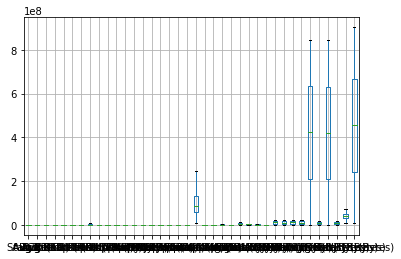

In [18]:
clean_df[numeric_columns].boxplot()

In [19]:
clean_df.head(20)

,Start ms,End ms,Dur. (ms),Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,770.00,662.00,245107.75,42.00,5.00,23.00,44.00,19520.00,7230.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,37624.00,38787.00,245108160.50,213.00,214.00,1545765.00,24420.00,1634479.00,1271433.00,3563542.00,137762.00,15854611.00,2501332.00,8198936.00,9656251.00,278082303.00,14344150.00,171744450.00,8814393.00,36749741.00,308879636.00
1,235.00,606.00,245107.75,65.00,5.00,16.00,26.00,19520.00,7230.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,168.00,3560.00,245108160.50,971.00,1022.00,1926113.00,7165.00,3493924.00,920172.00,629046.00,308339.00,20247395.00,19111729.00,18338413.00,17227132.00,608750074.00,1170709.00,526904238.00,15055145.00,53800391.00,653384965.00
2,1.00,652.00,245107.75,65.00,5.00,6.00,9.00,19520.00,7230.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,245108160.50,751.00,695.00,1684053.00,42224.00,8535055.00,1694064.00,2690151.00,672973.00,19725661.00,14699576.00,17587794.00,6163408.00,229584621.00,395630.00,410692588.00,4215763.00,27883638.00,279807335.00
3,486.00,171.00,245107.75,65.00,5.00,44.00,44.00,19520.00,7230.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,3330.00,37882.00,245108160.50,17.00,207.00,644121.00,13372.00,9023734.00,2788027.00,1439754.00,631229.00,21388122.00,15146643.00,13994646.00,1097942.00,799538153.00,10849722.00,749039933.00,12797283.00,43324218.00,846028530.00
4,565.00,954.00,245107.75,65.00,5.00,6.00,9.00,19520.00,7230.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,245108160.50,607.00,604.00,862600.00,50188.00,6248284.00,1500559.00,1936496.00,173853.00,15259380.00,18962873.00,17124581.00,415218.00,527707248.00,3529801.00,550709500.00,13910322.00,38542814.00,569138589.00
5,439.00,553.00,245107.75,65.00,5.00,70.00,54.00,19520.00,7230.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,22639.00,22700.00,245108160.50,112.00,118.00,3148833.00,51181.00,10351530.00,2582603.00,1980032.00,922378.00,21332918.00,2611113.00,7345361.00,6536448.00,710293538.00,13167974.00,654978277.00,4436057.00,30307754.00,754452212.00
6,612.00,168.00,245107.75,102.00,5.00,22.00,38.00,19520.00,7230.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,9785.00,316210.00,245108160.50,33.00,655.00,1623509.00,1482.00,1837897.00,3068975.00,1838947.00,252032.00,7234465.00,1886295.00,13231006.00,17981760.00,44796223.00,14084934.00,803653557.00,10649768.00,47925246.00,70562047.00
7,592.00,512.00,245107.75,39.00,18.00,3698.00,416.00,19520.00,7230.00,99.00,0.00,0.00,0.00,99.00,0.00,0.00,0.00,70832.00,74477.00,245108160.50,708.00,666.00,3103940.00,57463.00,1304524.00,2568189.00,2987408.00,512696.00,12189786.00,19735183.00,6858496.00,12075206.00,748906189.00,16149622.00,537601820.00,7714657.00,58813016.00,775350343.00
8,121.00,960.00,245107.75,39.00,18.00,46.00,49.00,3231397.00,7230.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,162472.00,176488.00,245108160.50,794.00,826.00,342043.00,30582.00,7560820.00,1341279.00,3014208.00,365861.00,18436641.00,10860867.00,10587264.00,8467177.00,821671285.00,6548349.00,172920486.00,14749031.00,42363146.00,861612261.00
9,0.00,284.00,245107.75,97.00,7.00,3845.00,2535.00,3231397.00,7230.00,77.50,10.00,2.00,0.00,99.00,0.00,0.00,0.00,1537874.00,1496398.00,245108160.50,4421.00,6005.75,1541259.00,44154.00,8601949.00

In [20]:
clean_df.to_csv('../data/clean_data.csv')

# User Overview

In [21]:
from overview import OverView

## Univariate Analysis

## Top 10 handsets used by the customers

In [22]:
new_df = OverView.filter_by_count(df,"Handset Type")
new_df   

,Handset Type,count
0,Huawei B528S-23A,19373
1,Apple iPhone 6S (A1688),9369
2,Apple iPhone 6 (A1586),8967
3,unknown,8820
4,Apple iPhone 7 (A1778),6240
...,...,...
1358,Kazam Mobile Lim. Kazam Trooper 451,1
1359,Xiaomi Communica. Redmi Note 2,1
1360,Huawei U8815,1
1361,Meizu Technology. M6 Note,1


## Top 3 handset Manufacturers

In [43]:
top_manufacturers = OverView.filter_by_count(df, 'Handset Manufacturer').head(3)
top_manufacturers

,Handset Manufacturer,count
0,Apple,59069
1,Samsung,39902
2,Huawei,33754


## Top 5 handsets per Top 3 handset manufacturer

In [42]:
top3_manufacturers = top_manufacturers.head(3)['Handset Manufacturer'].values
top_manufacturers = df[df["Handset Manufacturer"].isin(top3_manufacturers)]
top_manufacturers['Handset Type'].groupby(
    df['Handset Manufacturer']).apply(lambda x: x.value_counts().head(5))

Series([], Name: Handset Type, dtype: object)